### Test case LVV-T88: Verify implementation of Calibration Data Products

Verify that the DMS can produce and archive the required Calibration Data Products: cross talk correction, bias, dark, monochromatic dome flats, broad-band flats, fringe correction, and illumination corrections.

After executing the `ci_cpp` processing, this notebook will examine the outputs.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from lsst.daf.butler import Butler

Initialize the butler corresponding to the `ci_cpp` processing that was executed in "~/u/repos/ci_cpp_gen3/DATA".

In [2]:
butler = Butler('/repo/embargo', collections="LSSTCam/runs/DRP/20250604_20250814/w_2025_33/DM-52202")

In [5]:
calib_coll = 'LSSTCam/calib'

We see that there are collections corresponding to a variety of calibration object types, including brighter-fatter kernel (bfk), photon transfer curves (ptc), biases, darks, flats, and many others. There are also validation collections (denoted with "cpv" in their names) that result from the `cp_verify` process.

#### Brighter-fatter kernel

Retrieve a `bfk` dataset and examine it to confirm that it is well-formed.

In [6]:
bfk_refs = butler.query_datasets('bfk', collections=calib_coll)
bfk_refs[0]

DatasetRef(DatasetType('bfk', {instrument, detector}, BrighterFatterKernel, isCalibration=True), {instrument: 'LSSTCam', detector: 0}, run='LSSTCam/calib/DM-51897/3s_v1/bfkGen.20250808a/20250812T020009Z', id=65c1da4c-ea00-4987-a517-46f41ee0596b)

In [7]:
bfk = butler.get(bfk_refs[0])

In [8]:
bfk.toTable()[0].columns

<TableColumns names=('AMPLIFIER','EXP_ID_MASK','RAW_MEANS','RAW_VARIANCES','RAW_XCORRS','GAIN','NOISE','MEAN_XCORRS','KERNEL','VALID')>

In [9]:
print('BFK keys: ', bfk.meanXcorrs.keys())
bfk.meanXcorrs['C10'][1]

BFK keys:  dict_keys(['C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C07', 'C06', 'C05', 'C04', 'C03', 'C02', 'C01', 'C00'])


array([ 0.00000000e+00,  2.48892490e-09, -8.50487705e-09,  5.17243905e-09,
        1.50415998e-09, -2.33790928e-09, -3.17914735e-09, -1.45749134e-09,
       -2.32055438e-09, -1.85054070e-10, -3.53174343e-09, -8.98682541e-09,
        5.43801144e-10, -4.17819018e-09,  1.66699621e-09, -1.40697245e-08,
        1.66699621e-09, -4.17819018e-09,  5.43801144e-10, -8.98682541e-09,
       -3.53174343e-09, -1.85054070e-10, -2.32055438e-09, -1.45749134e-09,
       -3.17914735e-09, -2.33790928e-09,  1.50415998e-09,  5.17243905e-09,
       -8.50487705e-09,  2.48892490e-09,  0.00000000e+00], dtype='>f8')

We see that the `bfk` has expected table columns, entries for each of the 16 amps, and reasonable values for one of the amps (C10).

#### Defects mask

Retrieve a `defects` dataset and confirm that it is well formed.

In [10]:
defects_refs = butler.query_datasets('defects', collections=calib_coll)
defects_refs[0]

DatasetRef(DatasetType('defects', {instrument, detector}, Defects, isCalibration=True), {instrument: 'LSSTCam', detector: 0}, run='LSSTCam/calib/DM-50736/onSkyDefects/defectGen.20250506a/20250506T185623Z', id=daf7fb1a-e0a9-4919-9503-859ee2539beb)

In [11]:
defects = butler.get(defects_refs[0])

In [12]:
defects.toTable()

[<Table length=1768>
   x0    y0  width height
 int64 int64 int64 int64 
 ----- ----- ----- ------
  3385    11     1      2
   481    20     1      1
  3038    22     1      2
   470    23     1      1
  2570    23     2      1
  1390    25     2      1
  1390    26     1      1
   453    35     1      1
   449    37     1      1
   ...   ...   ...    ...
  3549  3995     1      5
  3557  3995     1      5
  3562  3995     3      5
  3567  3995     1      5
  3571  3995     2      5
  3775  3995     1      5
  3797  3995     1      5
  3999  3995     1      5
  4003  3995     1      5
  4015  3995     1      5]

We see that the defects mask has the expected format, with "blocks" of defects defined by their initial x, y positions (x0, y0) and their width and height.

#### Photon transfer curve (PTC)

Retrieve a `ptc` dataset and confirm it is well formed.

In [13]:
ptc_refs = butler.query_datasets('ptc', collections=calib_coll)
ptc_refs[0]

DatasetRef(DatasetType('ptc', {instrument, detector}, PhotonTransferCurveDataset, isCalibration=True), {instrument: 'LSSTCam', detector: 0}, run='LSSTCam/calib/DM-51897/3s_v1/ptcGen.20250808a/20250810T155447Z', id=6da4dc22-657c-47b6-8fcd-22cbed07446e)

In [14]:
ptc = butler.get(ptc_refs[0])

In [15]:
print(" ptc gains: ", ptc.gain, "\n\n", "ptc turnoffs: ", ptc.ptcTurnoff, "\n\n",
      "ptc amp offsets (detector C10): \n", ptc.ampOffsets['C10'])

 ptc gains:  {'C10': 1.684486114117431, 'C11': 1.6801240545907121, 'C12': 1.6746092146015976, 'C13': 1.6617318656417086, 'C14': 1.6478776518199605, 'C15': 1.634617523998986, 'C16': 1.620446421769451, 'C17': 1.5942037168455243, 'C07': 1.5275159221949688, 'C06': 1.5350088542880354, 'C05': 1.5382756025686537, 'C04': 1.5405504607255407, 'C03': 1.5568720081755578, 'C02': 1.5650444391514962, 'C01': 1.5810587014894204, 'C00': 1.6060460358492328} 

 ptc turnoffs:  {'C10': 58607.92469978744, 'C11': 61914.24997747118, 'C12': 65430.20752346467, 'C13': 69418.21853763855, 'C14': 72551.03453069337, 'C15': 75570.97263087449, 'C16': 78830.61411860424, 'C17': 79254.9041950177, 'C07': 65835.13344989726, 'C06': 63045.49420629794, 'C05': 61026.07254059665, 'C04': 58946.28612125975, 'C03': 56614.630959890565, 'C02': 54726.79773967955, 'C01': 52828.96508267351, 'C00': 50295.66563033084} 

 ptc amp offsets (detector C10): 
 [-3.25998397e+00 -3.96658464e+00 -5.39044414e+00 -6.68457235e+00
 -7.52384943e+00 -8.

We see that the PTC contains expected quantities for each of the 16 amps, including gain, the PTC turnoff, and amp offsets, among many other quantities.

#### Crosstalk correction


In [19]:
query = butler.query_datasets('preliminary_visit_image', band='g', detector=34)

In [21]:
# Select the first image and its crosstalk object:
pvi = butler.get(query[1])
crosstalk = butler.get("crosstalk", dataId=query[1].dataId)

In [22]:
crosstalk.getMetadata()

OBSTYPE = "CROSSTALK"
CROSSTALK_SCHEMA = "Gen3 Crosstalk"
CROSSTALK_VERSION = 1.2000000000000
INSTRUME = "LSSTCam"
RAFTNAME = <Unknown>
SLOTNAME = <Unknown>
DETECTOR = 34
DET_NAME = "R10_S21"
DET_SER = "ITL-3800C-446"
FILTER = <Unknown>
CALIB_ID = "instrument=LSSTCam raftName=R10 detectorName=R10_S21 detector=34 calibDate=1970-01-01T00:00:00"
SEQFILE = <Unknown>
SEQNAME = <Unknown>
SEQCKSUM = <Unknown>
CALIBCLS = "lsst.ip.isr.crosstalk.CrosstalkCalib"
DETECTOR_NAME = "R10_S21"
DETECTOR_SERIAL = "ITL-3800C-446"
HAS_CROSSTALK = 1
NAMP = 16
CROSSTALK_SHAPE = [ 16, 16 ]
CROSSTALK_RATIOS_UNITS = "electron"
CALIBDATE = "1970-01-01T00:00:00"
CALIB_CREATION_DATE = "2024-10-02"
CALIB_CREATION_TIME = "19:50:47.827041"
LSST BUTLER ID = "80ffb5d6-c7ae-47f7-8532-22b0e1f6607c"
LSST BUTLER RUN = "LSSTCam/calib/DM-51669/curated/19700101T000000Z"
LSST BUTLER DATASETTYPE = "crosstalk"
LSST BUTLER DATAID DETECTOR = 34
LSST BUTLER DATAID INSTRUMENT = "LSSTCam"


Plot an image of the crosstalk coefficients and their associated errors, to demonstrate the magnitude and accuracy of the crosstalk corrections.

Maximum crosstalk error: 5.7647094449183624e-06


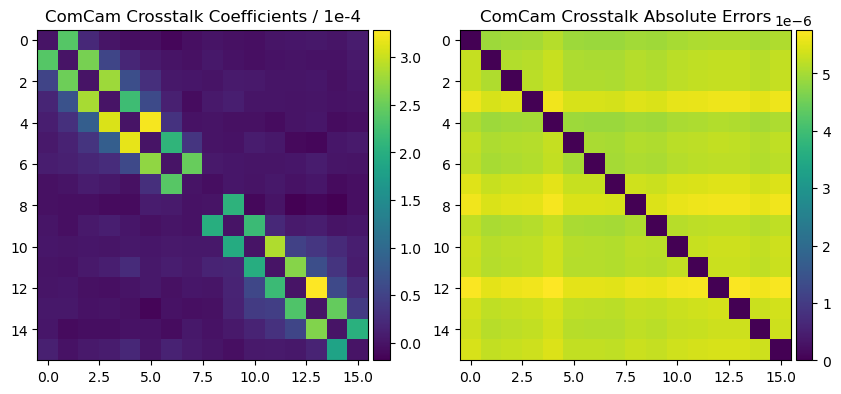

In [25]:
# Plot the errors listed in the calibration as an image.
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(np.array(crosstalk.coeffs)/1e-4)
ax1.set_title("ComCam Crosstalk Coefficients / 1e-4")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(np.array(crosstalk.coeffErr))
ax2.set_title("ComCam Crosstalk Absolute Errors")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

fig.show()
print(f"Maximum crosstalk error: {np.max(np.ravel(crosstalk.coeffErr))}")

#### Bias, dark, and flat frames

Retrieve a bias, dark and flat from the newly-created calib collection, and print their bounding box and mean/median/stdev pixel values to the screen. We will take these quantities as evidence that these are well-formed images.

In [16]:
calib_img_types = ['bias', 'dark', 'flat']

for imtype in calib_img_types:
    imrefs = butler.query_datasets(f"{imtype}", collections=calib_coll)
    print(imrefs[0])
    img = butler.get(imrefs[0])
    print("Image bounding box: \n", img.getBBox(), "\n")
    print(f" {imtype} mean pixel value: ", np.mean(img.getImage().array), "\n",
          f"{imtype} median pixel value: ", np.median(img.getImage().array), "\n",
          f"{imtype} pixel value stdev: ", np.std(img.getImage().array))
    print("\n")

bias@{instrument: 'LSSTCam', detector: 0} [sc=ExposureF] (run=LSSTCam/calib/DM-51897/3s_v1/biasGen.20250808a/20250813T082043Z id=a38652b6-cac7-4d5c-8dcb-c8471ae7737b)
Image bounding box: 
 (minimum=(0, 0), maximum=(4071, 3999)) 

 bias mean pixel value:  595.42426 
 bias median pixel value:  -0.0041780733 
 bias pixel value stdev:  9781.573


dark@{instrument: 'LSSTCam', detector: 0} [sc=ExposureF] (run=LSSTCam/calib/DM-51897/3s_v1/darkGen.20250814a/20250814T171631Z id=63b03545-aa3f-44c6-be55-f8fe580e3194)
Image bounding box: 
 (minimum=(0, 0), maximum=(4071, 3999)) 

 dark mean pixel value:  44.62463 
 dark median pixel value:  -0.0001934574 
 dark pixel value stdev:  543.76215


flat@{instrument: 'LSSTCam', detector: 0, physical_filter: 'empty', band: 'white'} [sc=ExposureF] (run=LSSTCam/calib/DM-50162/pseudoFlats/pseudoFlatGen.20250414b/run id=9b577c7b-a1d3-4aeb-bb38-812a93a3267d)
Image bounding box: 
 (minimum=(0, 0), maximum=(4071, 3999)) 

 flat mean pixel value:  0.562228 
 flat

## Results

We have confirmed that running `ci_cpp` has produced the expected datasets, and by inspecting a few of them, have confirmed that they are well-formed datasets with the expected characteristics. The result of this test is a **Pass**.